In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
a1 = ['송중기', '국어', 89]
a2 = ['김나현', '영어', 42]
a3 = ['박효신', '국어', 78]
a4 = ['김범수', '영어', 61]
a5 = ['권보아', '국어', 91]
a6 = ['한동근', '영어', 38]
df1 = pd.DataFrame([a1, a2, a3, a4, a5, a6], columns=["이름", "과목", "점수"])
df2 = df1.copy()
df3 = df1.copy()
s1 = pd.DataFrame([1, 2, 3, 4, 5, 6], columns=["s1"])

df1

,이름,과목,점수
0,송중기,국어,89
1,김나현,영어,42
2,박효신,국어,78
3,김범수,영어,61
4,권보아,국어,91
5,한동근,영어,38


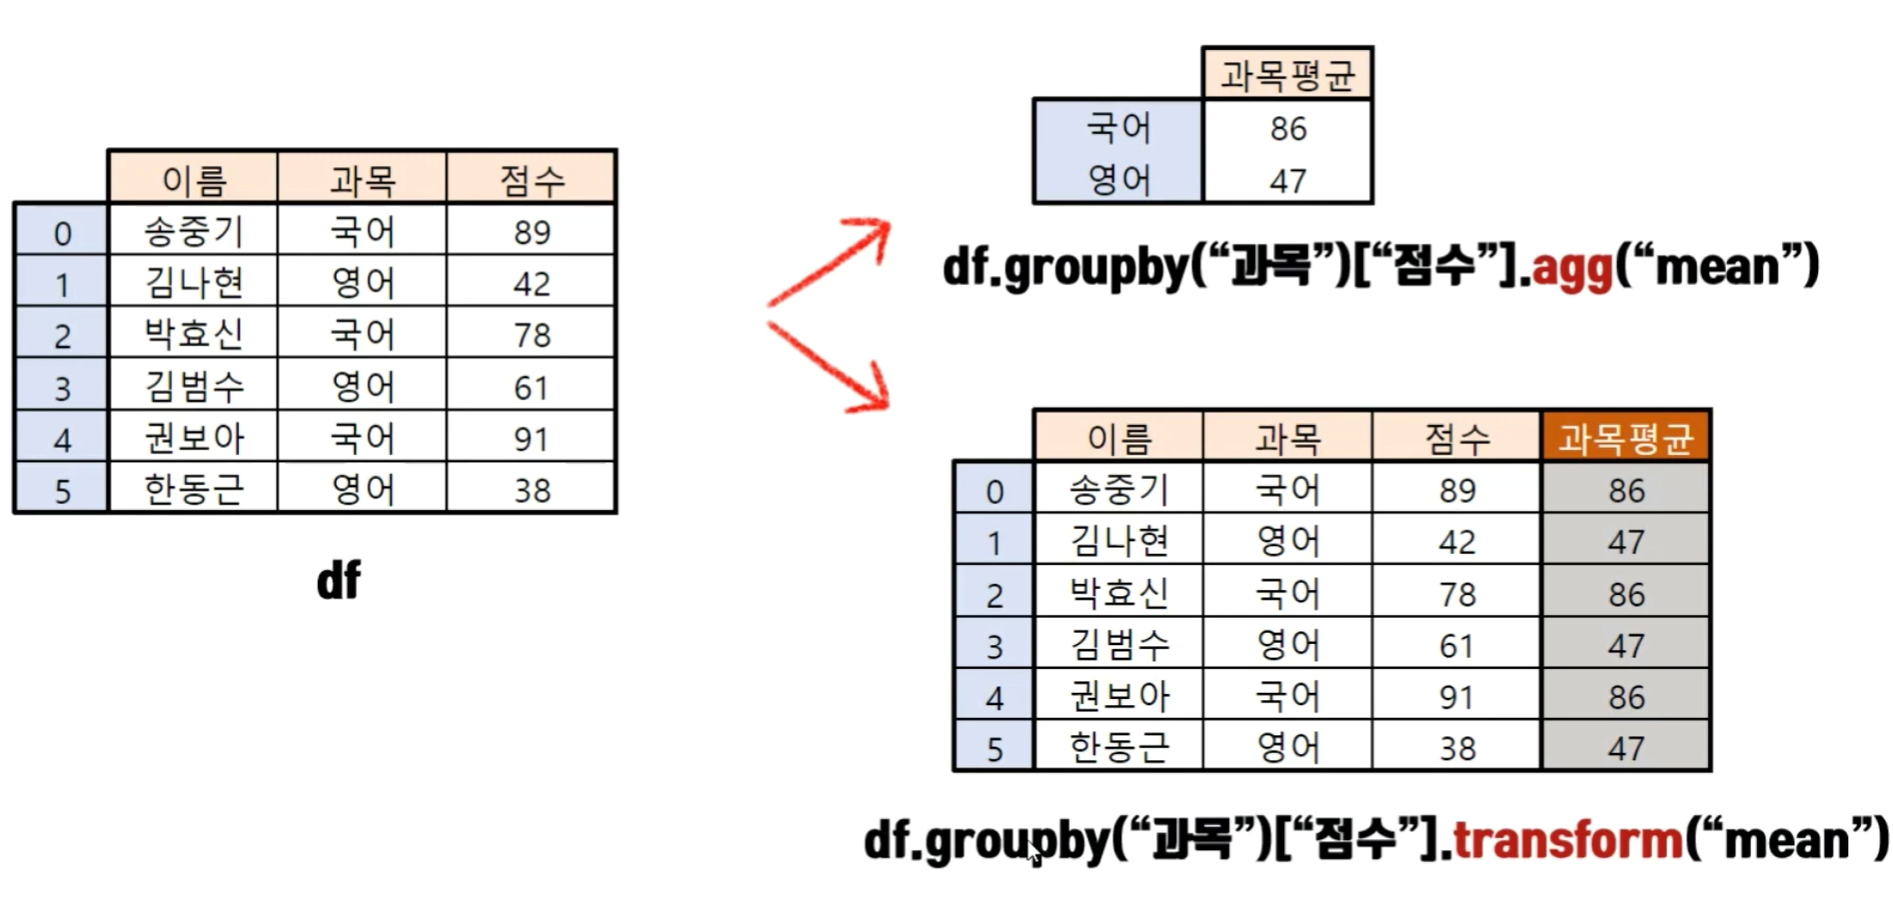

In [3]:
df1.groupby("과목")["점수"].transform("mean")

0   86.00
1   47.00
2   86.00
3   47.00
4   86.00
5   47.00
Name: 점수, dtype: float64

In [4]:
df1["과목평균"] = df1.groupby("과목")["점수"].transform("mean")
df1

# sql의 window함수과 같은듯
# avg(점수) over(patition by 과목)


,이름,과목,점수,과목평균
0,송중기,국어,89,86.00
1,김나현,영어,42,47.00
2,박효신,국어,78,86.00
3,김범수,영어,61,47.00
4,권보아,국어,91,86.00
5,한동근,영어,38,47.00


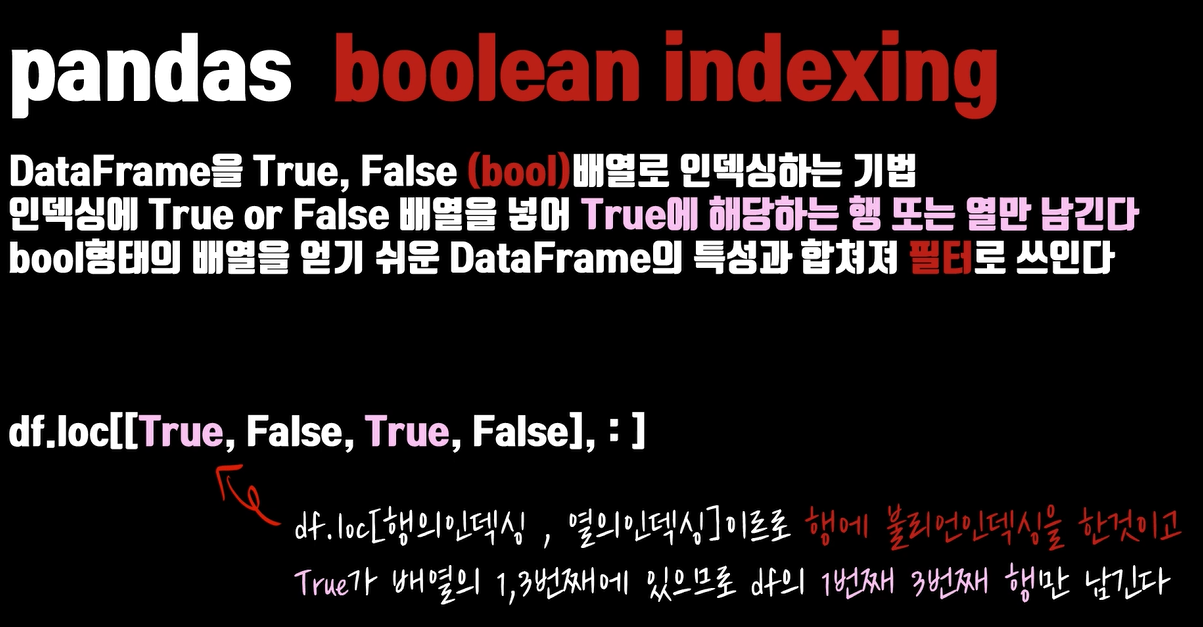

In [5]:
df1["점수"] > df1["과목평균"]

0     True
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [7]:
df1.loc[df1["점수"] > df1["과목평균"], :]
# 점수가 과목평균보다 높은 학생들의 데이터 추출

,이름,과목,점수,과목평균
0,송중기,국어,89,86.00
3,김범수,영어,61,47.00
4,권보아,국어,91,86.00


In [8]:
df2

,이름,과목,점수
0,송중기,국어,89
1,김나현,영어,42
2,박효신,국어,78
3,김범수,영어,61
4,권보아,국어,91
5,한동근,영어,38


In [9]:
df2.groupby("과목")["점수"].agg("mean")

과목
국어   86.00
영어   47.00
Name: 점수, dtype: float64

In [11]:
df2.groupby("과목")["점수"].agg("mean").reset_index()

,과목,점수
0,국어,86.00
1,영어,47.00


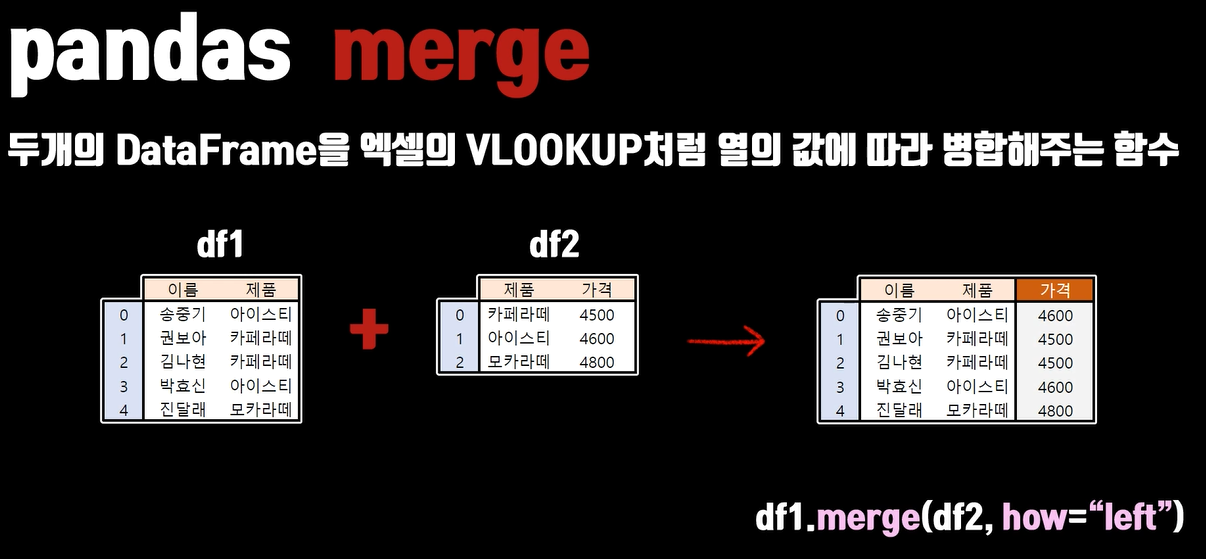

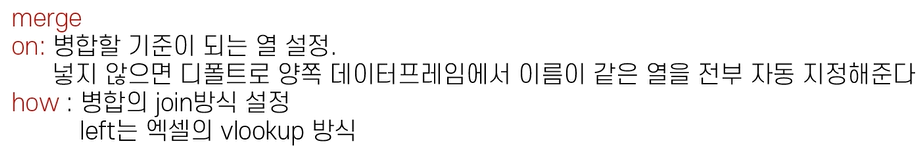

In [12]:
df4 = df2.groupby("과목")["점수"].agg("mean").reset_index()

df2.merge(df4, on="과목", how="left")
# 좀 더 번거롭지만 transform과 같은 결과를 얻을 수 있음

,이름,과목,점수_x,점수_y
0,송중기,국어,89,86.00
1,김나현,영어,42,47.00
2,박효신,국어,78,86.00
3,김범수,영어,61,47.00
4,권보아,국어,91,86.00
5,한동근,영어,38,47.00


In [13]:
df3

,이름,과목,점수
0,송중기,국어,89
1,김나현,영어,42
2,박효신,국어,78
3,김범수,영어,61
4,권보아,국어,91
5,한동근,영어,38


In [15]:
# transform에 람다 사용하기

df3.groupby("과목")["점수"].transform(lambda x : x.mean() + x.std())
# 과목평균 + 과목표준편차

0   93.00
1   59.29
2   93.00
3   59.29
4   93.00
5   59.29
Name: 점수, dtype: float64

In [16]:
df3["m+s"] = df3.groupby("과목")["점수"].transform(lambda x : x.mean() + x.std())
df3

,이름,과목,점수,m+s
0,송중기,국어,89,93.00
1,김나현,영어,42,59.29
2,박효신,국어,78,93.00
3,김범수,영어,61,59.29
4,권보아,국어,91,93.00
5,한동근,영어,38,59.29


In [17]:
s1

,s1
0,1
1,2
2,3
3,4
4,5
5,6


In [20]:
s1 > s1.mean()

,s1
0,False
1,False
2,False
3,True
4,True
5,True


In [21]:
df3

,이름,과목,점수,m+s
0,송중기,국어,89,93.00
1,김나현,영어,42,59.29
2,박효신,국어,78,93.00
3,김범수,영어,61,59.29
4,권보아,국어,91,93.00
5,한동근,영어,38,59.29


In [19]:
df3.groupby("과목")["점수"].transform(lambda x: x > x.mean())
# 과목평균을 구함
# 불리언 인덱싱

0     True
1    False
2    False
3     True
4     True
5    False
Name: 점수, dtype: bool

In [23]:
df3.loc[df3.groupby("과목")["점수"].transform(lambda x: x > x.mean()), :]

# df1처럼 과목평균의 열을 별도로 만들지 않아도, 람다를 통해 불리언 인덱싱으로 처리 가능
# 

,이름,과목,점수,m+s
0,송중기,국어,89,93.00
3,김범수,영어,61,59.29
4,권보아,국어,91,93.00
